# k-NN and k-D tree implementation in Julia
1st we call the packages that we will use

In [39]:
using NearestNeighbors, Plots
using PyCall, Random
using DataFrames

Now we set 100 random points and the seed to could reproduce the results

In [13]:
Random.seed!(1)

f1_train = rand(100);
f2_train = rand(100);

Let's plot points to see the scatter

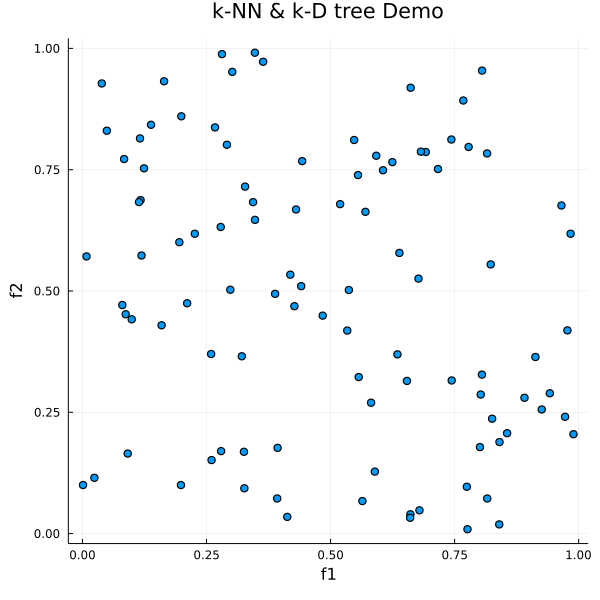

In [76]:
gr(size = (600,600))
p_knn = scatter(f1_train,f2_train, xl = "f1", yl = "f2", title="k-NN & k-D tree Demo", label=false)

To build the k-D tree we use the package loaded, in order to feed the model we set the matrix with the random point and transpose it

In [77]:
#building tree
X_train_t = [f1_train f2_train]'

kdtree =KDTree(X_train_t)

KDTree{StaticArraysCore.SVector{2, Float64}, Euclidean, Float64}
  Number of points: 100
  Dimensions: 2
  Metric: Euclidean(0.0)
  Reordered: true

We create a test random point that is goint to be the axis for the k nearest points

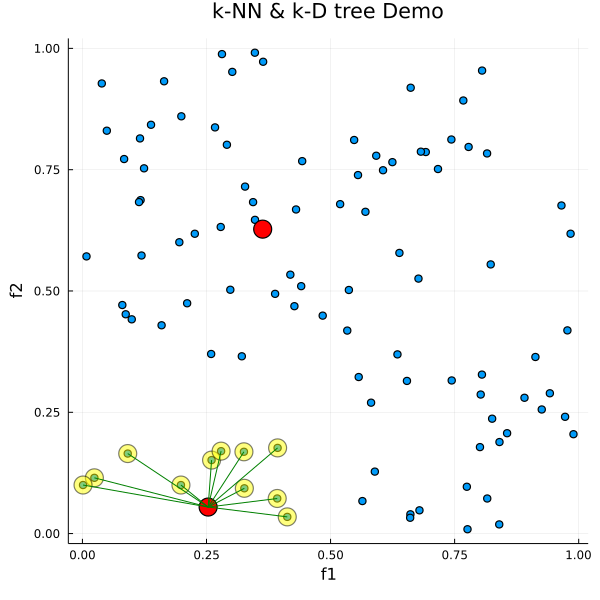

In [82]:
# Initialize k for k-NN
k = 11
# Generate Random test point
f1_test = rand()

f2_test = rand()

X_test = [f1_test, f2_test]
#test plot
scatter!([X_test[1]], [X_test[2]], label =false,
    c = :red,
    ms = 10)

Find nearest neighbors using k-NN & k-d tree

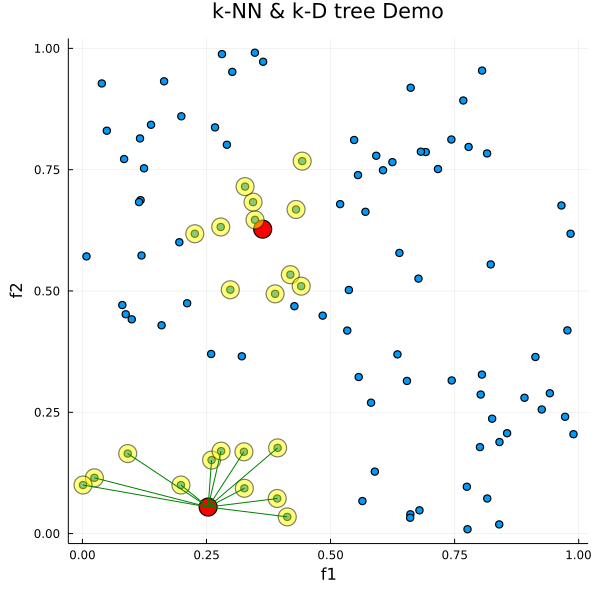

In [83]:
index_knn, distances = knn(kdtree, X_test, k, true)

# display output

output = [index_knn distances]

# plot nearest neighbors

f1_knn = [f1_train[i] for i in index_knn]

f2_knn = [f2_train[i] for i in index_knn]

scatter!(f1_knn, f2_knn,
    color = :yellow, markersize = 10, alpha = 0.5, label = false
)

Connect test point with nearest neighbors


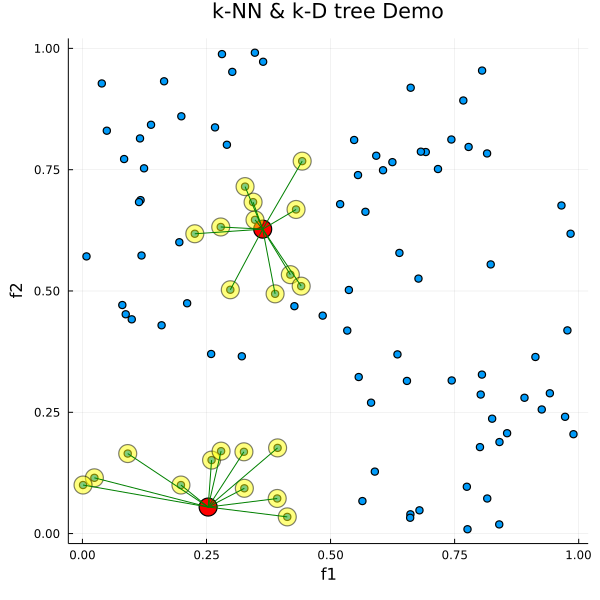

In [84]:
for i in 1:k
    plot!([f1_test, f1_knn[i]], [f2_test, f2_knn[i]], label =false,
        color = :green
    )
end

p_knn

# Aplication

In [88]:
using RDatasets, StatsBase, Statistics

Load Data  

In [97]:
iris = dataset("datasets","iris")
X = Matrix(iris[:,1:4])
y = Vector{String}(iris.Species);

Splitting data 

In [103]:
ModelSelection = pyimport("sklearn.model_selection")
X_train, X_test, y_train, y_test =
 ModelSelection.train_test_split(X,y);

Build Tree

In [107]:
k_Dtree = KDTree(X_train')

KDTree{StaticArraysCore.SVector{4, Float64}, Euclidean, Float64}
  Number of points: 112
  Dimensions: 4
  Metric: Euclidean(0.0)
  Reordered: true

In [141]:
k = 11 #5 nn
index_knn, distances = knn(k_Dtree, X_test',k, true);

# Post processing
First we convert a vector of vectors in a matrix

In [142]:
index_knn_matrix = hcat(index_knn...)
index_knn_matrix'
#To see the classes associated
knn_classes = y_train[index_knn_matrix']

38×11 Matrix{String}:
 "setosa"      "setosa"      "setosa"      …  "setosa"      "setosa"
 "setosa"      "setosa"      "setosa"         "setosa"      "setosa"
 "setosa"      "setosa"      "setosa"         "setosa"      "setosa"
 "setosa"      "setosa"      "setosa"         "setosa"      "setosa"
 "versicolor"  "versicolor"  "versicolor"     "versicolor"  "versicolor"
 "setosa"      "setosa"      "setosa"      …  "setosa"      "setosa"
 "setosa"      "setosa"      "setosa"         "setosa"      "setosa"
 "virginica"   "virginica"   "virginica"      "virginica"   "virginica"
 "virginica"   "virginica"   "virginica"      "virginica"   "virginica"
 "versicolor"  "versicolor"  "versicolor"     "versicolor"  "virginica"
 ⋮                                         ⋱                ⋮
 "setosa"      "setosa"      "setosa"         "setosa"      "setosa"
 "setosa"      "setosa"      "setosa"      …  "setosa"      "setosa"
 "setosa"      "setosa"      "setosa"         "setosa"      "setosa"
 "virg

Now to make prediction we use Statsbase

In [143]:
ŷ = [
    argmax(countmap(knn_classes[i,:]))
    for i=1:length(y_test)
];
#vscodedisplay(knn_classes)

38-element Vector{String}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "versicolor"
 "setosa"
 "setosa"
 "virginica"
 "virginica"
 "versicolor"
 ⋮
 "setosa"
 "setosa"
 "setosa"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "versicolor"
 "versicolor"

Demostration of countmap() and argmax()

In [144]:
demo = knn_classes[20,:]

countmap_demo = 
    countmap(demo) # It gives a dictionary with the count of eahc time that a tag appears
argmax_demo = 
    argmax(countmap_demo) #It gives the tag that is repeated the most

"virginica"

Checking accuracy

In [145]:
accuracy = mean(ŷ.==y_test)

0.9473684210526315

Notes: To selec the k it must be not too low, not too high,
odd number,
k > # of Classes,
Try multiple values: test accuracy, and scale features
